<a href="https://colab.research.google.com/github/GhaziDhouafli/Machine-Learning-Projects/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn. linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [18]:
diabetes_dataset = pd.read_csv('/content/diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [20]:
X = diabetes_dataset.drop(columns= 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

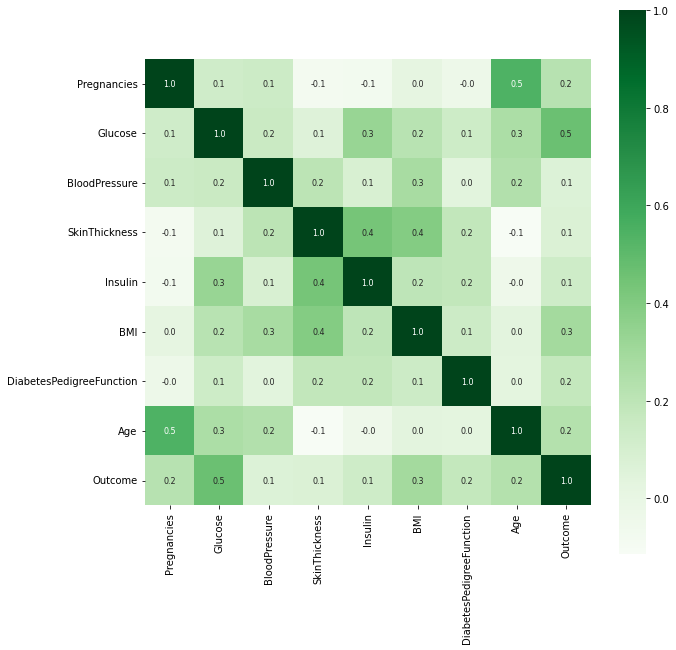

In [21]:
correlation = diabetes_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

In [22]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X= standardized_data

In [24]:
models=[svm.SVC(kernel='linear'),LogisticRegression(max_iter=1000),KNeighborsClassifier(),RandomForestClassifier()]
for model in models:
  cv_score = cross_val_score(model, X,Y, cv=5)
  mean_accuracy = sum(cv_score)/len(cv_score)
  mean_accuracy = mean_accuracy*100
  print('Cross Validation accuracies for ', model, '=  ', cv_score)
  print('Accuracy % of the ', model, mean_accuracy)

Cross Validation accuracies for  SVC(kernel='linear') =   [0.76623377 0.75974026 0.75974026 0.81699346 0.76470588]
Accuracy % of the  SVC(kernel='linear') 77.34827264239028
Cross Validation accuracies for  LogisticRegression(max_iter=1000) =   [0.77272727 0.74675325 0.75324675 0.81699346 0.76470588]
Accuracy % of the  LogisticRegression(max_iter=1000) 77.08853238265002
Cross Validation accuracies for  KNeighborsClassifier() =   [0.72077922 0.73376623 0.71428571 0.77124183 0.7254902 ]
Accuracy % of the  KNeighborsClassifier() 73.3112638994992
Cross Validation accuracies for  RandomForestClassifier() =   [0.75974026 0.73376623 0.75974026 0.83006536 0.75163399]
Accuracy % of the  RandomForestClassifier() 76.69892199303965


We can see that LinearSVC has the highest accuracy, so it'll be the algorithm that we are going to work with in order to finish our model.

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify= Y, random_state=2)
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [28]:
test_data_prediction = classifier.predict(X_test)
score =accuracy_score(Y_test, test_data_prediction)
print('accuracy_scorer=',score)

accuracy_scorer= 0.7727272727272727
